In [1]:
"""
Combine all components of OW == Nav, baro, temp

"""



'\nCombine all components of OW == Nav, baro, temp\n\n'

In [1]:
"""
1. Load filtered data for all ships (all years) in OW
"""
import pandas as pd

out_folder='/Users/praveenteleti/python_data/ww2_ow_05112021/'

fn=out_folder+'WW2_all_filtered_df_retired_df'+'.csv'

filter_df=pd.read_csv(fn)


In [4]:
import OW_extractData as ed

yrcount=ed.shipCountbyYear(filter_df,1942)

retired_df=ed.saveRetiredShipbyYear(filter_df,'monaghan',1942)

In [1]:
import pandas as pd
import OW_extractData as ed

fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_retired_df_22042022.csv'
retired_df=pd.read_csv(fn)

In [2]:
nav_df=ed.extractRawNavigation(retired_df)

In [4]:
baro_df=ed.extractRawBarometer(retired_df)

In [5]:
temp_df=ed.extractRawThermometer(retired_df)

In [33]:
raw_combined_df=saveRawData(nav_df,baro_df,temp_df)

/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_all_raw_df_22042022.csv


In [1]:
import pandas as pd
import OW_extractData as ed
import OW_processData as opd

fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_all_raw_df_22042022.csv'
raw_combined_df=pd.read_csv(fn)

In [2]:
dates_df=opd.processDates(raw_combined_df)

In [3]:
zones_df=opd.processZones(raw_combined_df)

In [4]:
positions_df=opd.processPositions(raw_combined_df)
latlon_positions_df=opd.positionToLatLon(positions_df)

In [5]:
newkey={'NANDI BAY, FIJI':{'lat':-16.96,'lon':178.78},'Nandi Bay, Fiji':{'lat':-16.96,'lon':178.78}}

places_df=opd.processPlaces(raw_combined_df)

In [9]:
# opd.findCommonPlaces(places_df)

In [6]:
nav_combined_df=opd.combineNavProcessed(raw_combined_df,dates_df,zones_df,latlon_positions_df,places_df)

In [7]:
baro_df=opd.processBaroRaw(raw_combined_df)

In [8]:
temp_df=opd.processTempRaw(raw_combined_df)

In [10]:
processed_combined_df=opd.saveProcessedData(nav_combined_df,baro_df,temp_df)

In [ ]:
infilled_df=opd.inFillLatLon(processed_combined_df)

In [11]:
#======================removing duplicates and kml after this line // Manual ============== 

In [16]:
from collections import Counter
fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_infilled_processed_df_23042022_gdrivev3.csv'
gdrive_df=pd.read_csv(fn)

#dts=pd.to_datetime(gdrive_df['Date_fmt']) 365*24 = 8760
letter_counts = Counter(gdrive_df.Date)#qq.workflow_name)
img_count=pd.DataFrame.from_records(letter_counts.most_common(), columns=['image','count'])
img_count.head(20)

,image,count
0,1942-Jan-01,24
1,1942-Jan-03,24
2,1942-Jan-04,24
3,1942-Jan-02,24
4,1942-Jan-05,24
5,1942-Jan-06,24
6,1942-Jan-07,24
7,1942-Jan-08,24
8,1942-Jan-09,24
9,1942-Jan-10,24


In [17]:
#====find missing date====

yr_dt_lst=pd.date_range(start='1/1/1942', end='31/12/1942').strftime('%Y-%b-%d').tolist()

dts=gdrive_df.Date.unique().tolist()
dlst=[]
for dt in yr_dt_lst:
    if not dt in dts:
        print(dt)
        dlst.append(dt)
        

1942-Apr-25
1942-Nov-16


In [18]:
#=====Now make dateHours=========
#====Visualize the track======
#====Make kml file=====

In [1]:
import pandas as pd
import OW_processData as opd
import OW_vizData as vd
#file after editting
fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_infilled_processed_df_23042022_gdrivev3.csv'
gdrive_df=pd.read_csv(fn)


In [2]:
withDH=opd.makedateHours(gdrive_df)

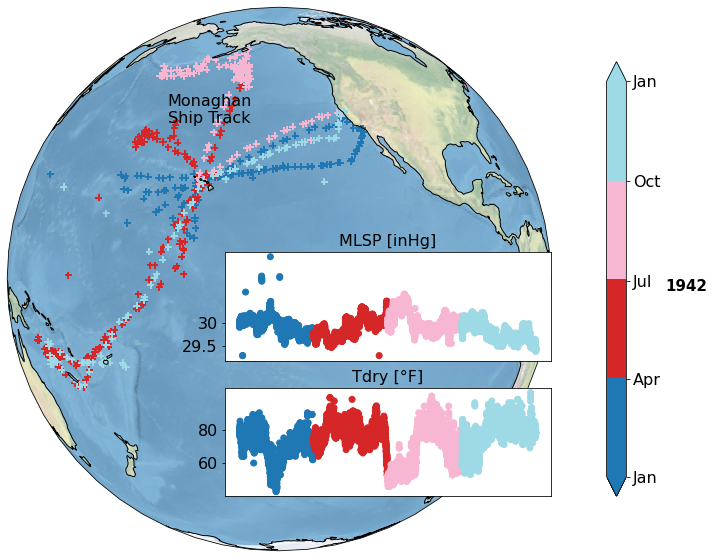

In [3]:
ff=vd.makeGlobeplot(withDH)

In [4]:
#save fig
fn='/Users/praveenteleti/Documents/GloSAT/WW2 project data/Monagan_1942_300dpi'+'.png'#pdf'
ff.savefig(fn,bbox_inches='tight',dpi=300)

In [3]:
kmlprt=vd.makeKMLfile(withDH)

In [5]:
# kmlprt

In [9]:
# withDH['comLat'].plot()

In [ ]:
#=======Test script after this line==============

In [1]:
import pandas as pd
import OW_extractData as ed
import OW_processData as opd

fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_all_processed_df_22042022.csv'
processed_combined_df=pd.read_csv(fn)

#=opd.processPositions(raw_combined_df)

In [6]:
infilled_df=opd.inFillLatLon(processed_combined_df,printFile=True)

In [ ]:
import datetime

def saveRawData(nav_df,baro_df,temp_df):
    
    raw_combined_df=pd.concat([nav_df,baro_df,temp_df],axis=1,ignore_index=True)
    raw_combined_df.columns=list(nav_df.columns)+list(baro_df.columns)+list(temp_df.columns)
    #raw_combined_df.reset_index(drop=True,inplace=True)
    #remove duplicate columns before consensus
    raw_combined_df = raw_combined_df.loc[:,~raw_combined_df.columns.duplicated()]
    
    ship_name=raw_combined_df['ship_name'].iloc[0]
    yr_name=raw_combined_df['year_image'].iloc[0]
    
    #save csv
    #ship_retired_df.drop(columns=['index'],inplace=True)
    out_folder='/Users/praveenteleti/python_data/ww2_ow_05112021/'
    today=datetime.datetime.now().strftime('%d%m%Y')
    
    fn=out_folder+ship_name+'_'+str(yr_name)+'_all_raw_df_'+today+'.csv'
    printFile=1
    
    if printFile:
        raw_combined_df.to_csv(fn,index=False)
        
    return raw_combined_df
    

In [9]:
# infilled_df[['comLat','comLon']].iloc[-24:]

In [69]:
import numpy as np
"""
Fill-in comLat and comLon, by selecting all row for each subject_ids
If comLat and comLon is present at 8,12 and 20
"""

unique_subject_ids=list(processed_combined_df['subject_ids'].unique())
unique_subject_ids.sort()
#image name
comLatList=[]
comLonList=[]

# image_name=temp['image_name'].iloc[0]

for sid in unique_subject_ids:
    temp=[]
    temp=processed_combined_df[processed_combined_df['subject_ids']==sid].copy()#[row_indexer,column_indexer]
    temp.sort_values(by=['hours'],inplace=True)
    
    if not temp['comLat'].iloc[7]=='empty':
        comLatList.extend(np.repeat(temp['comLat'].iloc[7],8))
        comLonList.extend(np.repeat(temp['comLon'].iloc[7],8))
    else:
        comLatList.extend(np.repeat('empty',8))
        comLonList.extend(np.repeat('empty',8))
        
    if not temp['comLat'].iloc[11]=='empty':
        comLatList.extend(np.repeat(temp['comLat'].iloc[11],4))
        comLonList.extend(np.repeat(temp['comLon'].iloc[11],4))
    else:
        comLatList.extend(np.repeat('empty',4))
        comLonList.extend(np.repeat('empty',4))
        
    if not temp['comLat'].iloc[19]=='empty':
        comLatList.extend(np.repeat(temp['comLat'].iloc[19],12))
        comLonList.extend(np.repeat(temp['comLon'].iloc[19],12))
    else:
        comLatList.extend(np.repeat('empty',12))
        comLonList.extend(np.repeat('empty',12))
        
inFilled=processed_combined_df.copy()

inFilled['comLat']=pd.Series(comLatList)
inFilled['comLon']=pd.Series(comLonList)

In [7]:
# processed_combined_df.info()

In [72]:
#processed_combined_df[msk]

In [12]:
fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_processed.csv'
nav_combined_df.to_csv(fn,index=False)

In [1]:
import pandas as pd
import OW_extractData as ed
import OW_processData as opd

fn='/Users/praveenteleti/python_data/ww2_ow_05112021/monaghan_1942_all_processed_df_22042022.csv'
positions_df=pd.read_csv(fn)

#=opd.processPositions(raw_combined_df)

In [6]:
newkey={'NANDI BAY, FIJI':{'lat':-16.96,'lon':178.78},'Nandi Bay, Fiji':{'lat':-16.96,'lon':178.78}}
xx=opd.positionToLatLon(positions_df)

In [8]:
# pd.to_numeric(xx['Lat'],errors='coerce').plot()